<a href="https://colab.research.google.com/github/RicardoMenna/MachineLearning_TP5/blob/main/TPN%C2%B05_Crimenes_en_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico N°5**
**Ejercicio: Crímenes violentos en los estados de EEUU** 

**Este conjunto de datos contiene estadísticas, en arrestos por cada 100,000 residentes por asalto, asesinato y violación en cada uno de los 50 estados de EE. UU. En 1973. También se da el porcentaje de la población que vive en áreas urbanas. El objetivo de este proyecto es identificar jerarquías de grupos de estados de EE. UU. Según los datos de tasas de delitos violentos.**

In [52]:
"""Importaciones"""

%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy import random, float, array
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

**Creo un DataFrame con los datos y muestro las primeras 5 filas.**


In [14]:
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
violent_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Agrego una etiqueta al Dataframe con la suma de los delitos en cada estado.**

In [16]:
violent_crime["Total"]=violent_crime["Murder"]+violent_crime["Assault"]+violent_crime["UrbanPop"]+violent_crime["Rape"]
violent_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


**A continuación, para una mejor visualización muestro el número total de arrestos por estos delitos y el número correspondiente a UrbanPop en cada estado.**

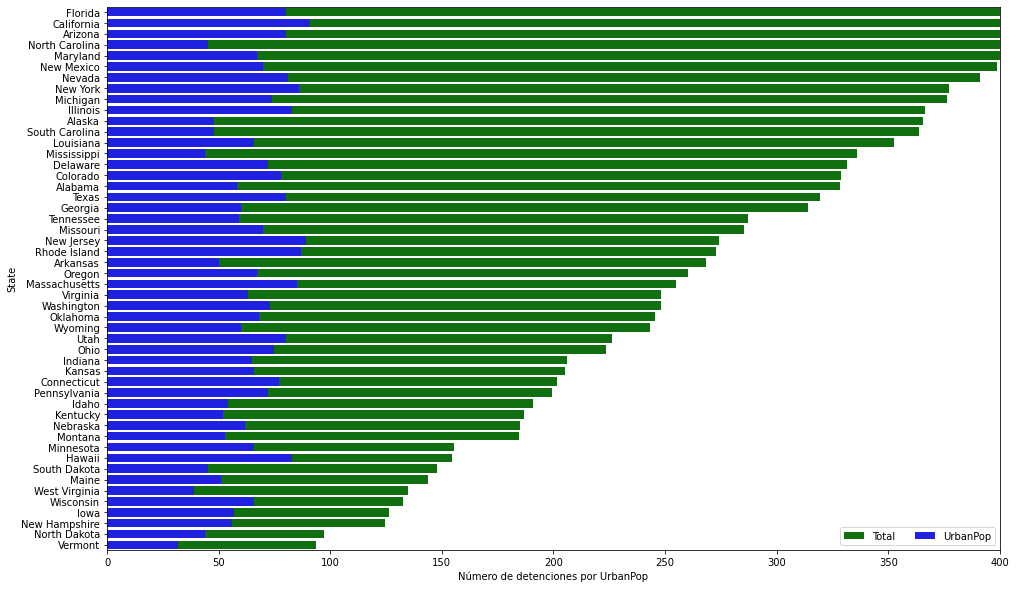

In [24]:
# Inicializo la figura

f, ax = plt.subplots(figsize=(16, 10))

# Cargo los datos

stats = violent_crime.sort_values("Total", ascending=False)


sns.barplot(x="Total", y="Unnamed: 0", data=stats,
            label="Total", color="g")

sns.barplot(x="UrbanPop", y="Unnamed: 0", data=stats,
            label="UrbanPop", color="b")

# Agrego nombres a ejes y leyendas
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Número de detenciones por UrbanPop");

**De la misma manera visualizo el resto de las detenciones.**

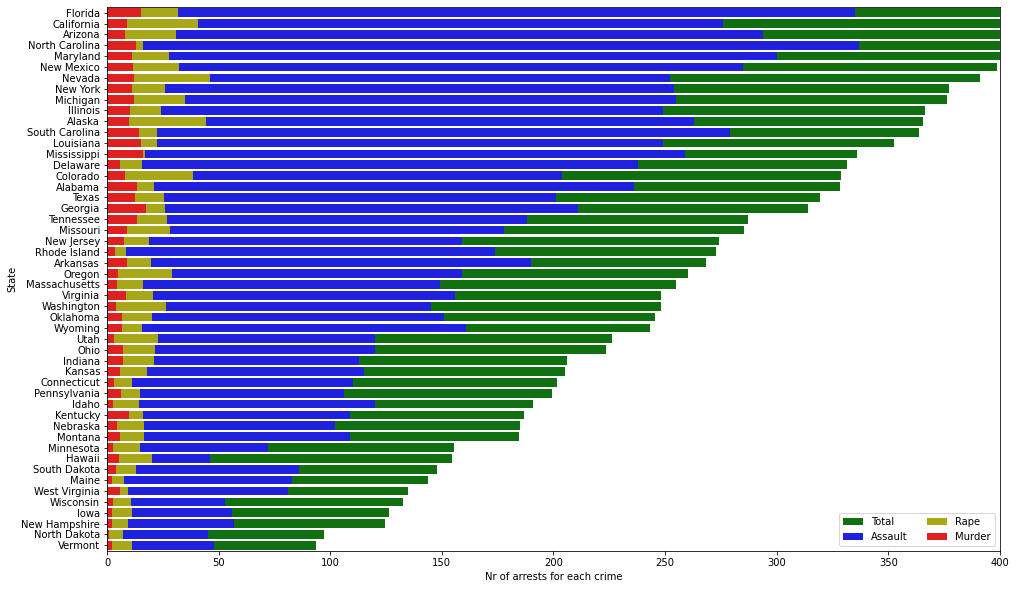

In [23]:
# Inicializo la figura

f, ax = plt.subplots(figsize=(16, 10))

# Cargo los datos

stats = violent_crime.sort_values("Total", ascending=False)


sns.barplot(x="Total", y="Unnamed: 0", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="Unnamed: 0", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="Unnamed: 0", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="Unnamed: 0", data=stats,
            label="Murder", color="r")

#Agrego nombres a ejes y leyendas
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Número de detenciones por cada delito");

**Defino las entradas.**

In [37]:
X = np.array(violent_crime[["Murder","Assault","UrbanPop","Rape"]])
y = np.array(violent_crime["Unnamed: 0"])
X.shape

(50, 4)

**Busco la cantidad óptima de Clusters.**

In [45]:
X = violent_crime[["Murder","Assault","UrbanPop","Rape"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "cluster_errors": cluster_errors, "num_clusters":cluster_range } )

clusters_df[0:10]

,cluster_errors,num_clusters
0,200.000000,1
1,104.961633,2
2,80.085695,3
3,57.554259,4
4,49.993843,5
5,44.335165,6
6,40.596983,7
7,36.550566,8
8,31.555535,9
9,28.704534,10


**Hallo el valor de K haciendo una gráfica e intentando hallar el “punto de codo”.**

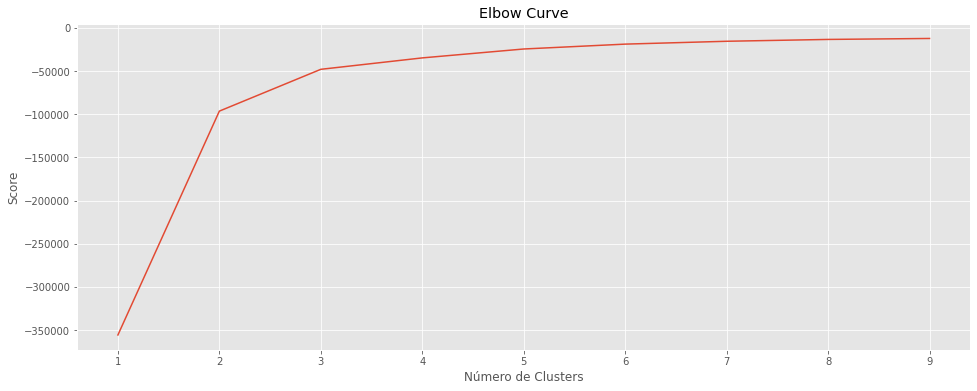

In [63]:
num_cluster = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cluster]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.figure(figsize=(16,6))
plt.plot(num_cluster,score)
plt.xlabel("Número de Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

**Considero 4 un buen número para K, esto es subjetivo.**

**Obtengo las etiquetas y los centroides.**

In [47]:
kmeans = KMeans(n_clusters=4).fit(X)
centroides = kmeans.cluster_centers_
print(centroides)

[[ 11.8125     272.5625      68.3125      28.375     ]
 [  5.59       112.4         65.6         17.27      ]
 [  8.21428571 173.28571429  70.64285714  22.84285714]
 [  2.95        62.7         53.9         11.51      ]]


**Ahora veo esto en una gráfica 3D con colores para los grupos y veo si se diferencian, el signo "+" marca el centro del centroide.**

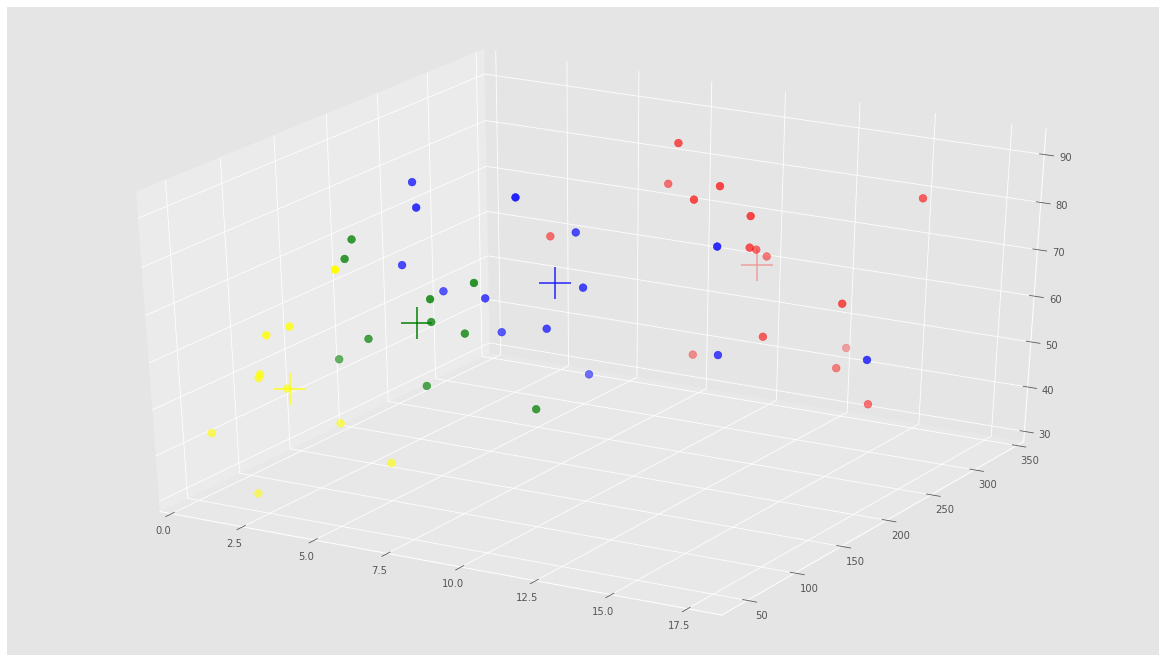

In [59]:
#Predicción de Clusters
labels = kmeans.predict(X)
#Conseguir los centros de los clusters
C = kmeans.cluster_centers_
color=["red","green","blue","yellow"]
asignar=[]
for i in labels:
    asignar.append(color[i])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker="+", c=color, s=1000)

**Hago gráficas con las proyecciones a partir de la gráfica 3D.**

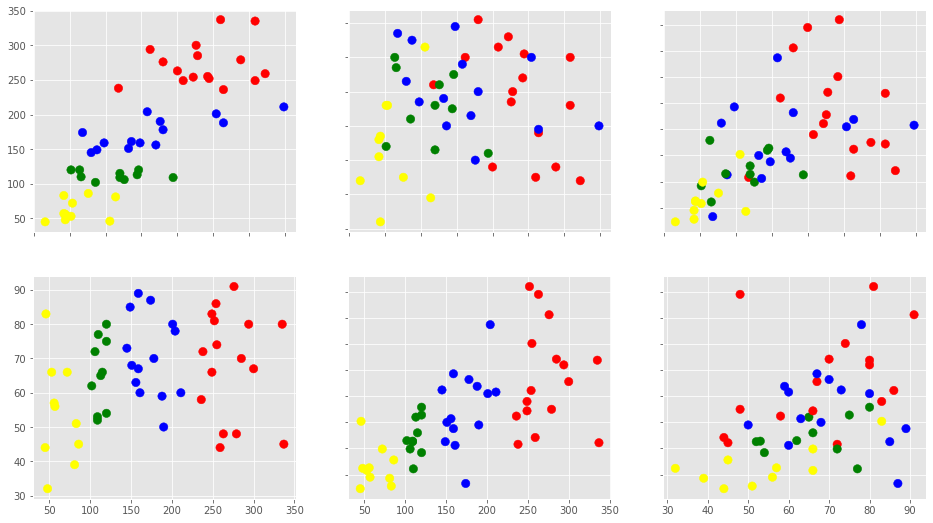

In [60]:
f1 = violent_crime["Murder"].values
f2 = violent_crime["Assault"].values
f3 = violent_crime["UrbanPop"].values
f4 = violent_crime["Rape"].values

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.scatter(f1, f2, c=asignar, s=70)
ax2.scatter(f1, f3, c=asignar, s=70)
ax3.scatter(f1, f4, c=asignar, s=70)
ax4.scatter(f2, f3, c=asignar, s=70)
ax5.scatter(f2, f4, c=asignar, s=70)
ax6.scatter(f3, f4, c=asignar, s=70)

for ax in fig.get_axes():
    ax.label_outer()

**Hago un análisis de correlación.**

In [65]:
var_correlation = violent_crime[['Murder', 'Assault', 'Rape', 'UrbanPop']]
var_correlation.corr() 

,Murder,Assault,Rape,UrbanPop
Murder,1.000000,0.801873,0.563579,0.069573
Assault,0.801873,1.000000,0.665241,0.258872
Rape,0.563579,0.665241,1.000000,0.411341
UrbanPop,0.069573,0.258872,0.411341,1.000000


**El asesinato y el asalto tienen las correlaciones más altas, mientras que el tamaño de UrbanPop no es significativo.**

**Clasifico los datos según los 4 grupos.**

In [67]:
stats = violent_crime.sort_values("Total", ascending=True)
violent_crime_total= pd.DataFrame(stats)

violent_crime_total.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Total,Crime_clusters
44,Vermont,2.2,48,32,11.2,93.4,2
33,North Dakota,0.8,45,44,7.3,97.1,2
28,New Hampshire,2.1,57,56,9.5,124.6,2
14,Iowa,2.2,56,57,11.3,126.5,2
48,Wisconsin,2.6,53,66,10.8,132.4,2


**Muestro como quedan distribuidos los estados en los clusters.**

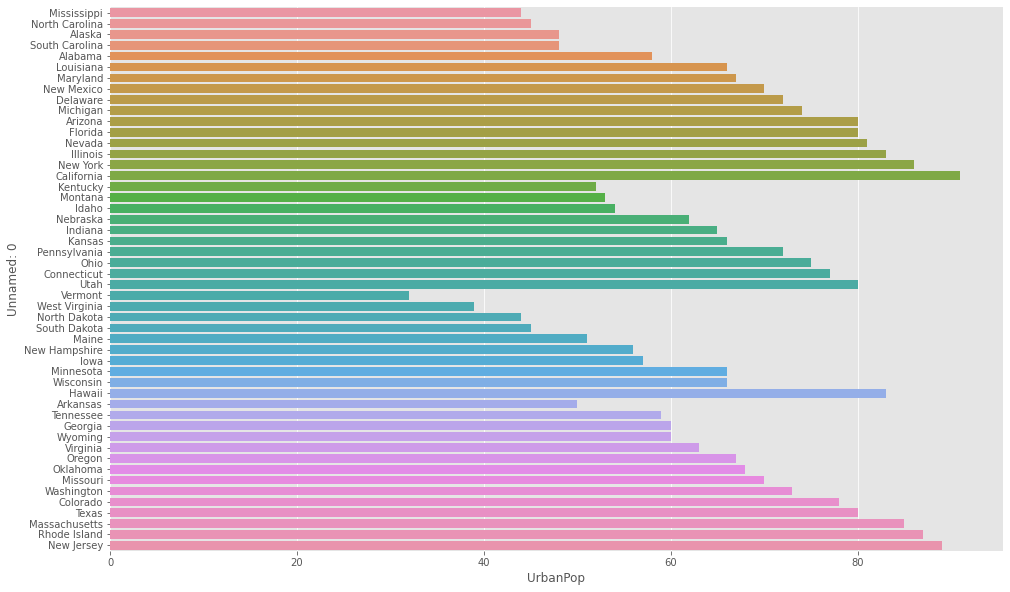

In [73]:
f, ax = plt.subplots(figsize=(16, 10))

# Cargo los datos
stats = violent_crime.sort_values([ "Crime_clusters", "UrbanPop"], ascending=True)
sns.barplot(y="Unnamed: 0", x="UrbanPop", data=stats)

sns.despine(left=True, bottom=True)

**Para que se vea mejor utilizo un mapa de USA con los estados divididos según el cluster (este mapa no es hecho por mi, busqué como hacerlo y encontré que ya estaba hecho).**

In [41]:
from IPython.display import HTML
import base64

df = violent_crime
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

In [42]:
%%HTML

<div class='tableauPlaceholder' id='viz1558006161579' style='position: relative'>
<noscript>
<a href='#'>
<img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1_rss.png' style='border: none' /></a>
</noscript>

<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='USCrimeRatesClusters&#47;Dashboard' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1.png' /> <param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
</object>
</div>               
<script type='text/javascript'>                    var divElement = document.getElementById('viz1558006161579');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='700px';vizElement.style.height='527px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
